In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [4]:
dataset = pd.read_csv("2_letter_recognition.data", sep = ",")

In [5]:
X = dataset.iloc[:, 1 : 17]
Y = dataset.select_dtypes(include = [object])

In [7]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size = 0.20, random_state = 10)

In [8]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [9]:
X_train = scaler.transform(X_train)
X_validation = scaler.transform(X_validation)

In [10]:
mlp = MLPClassifier(hidden_layer_sizes = (250, 300), max_iter = 1000000, activation = 'logistic')


C:\Users\walun\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\walun\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


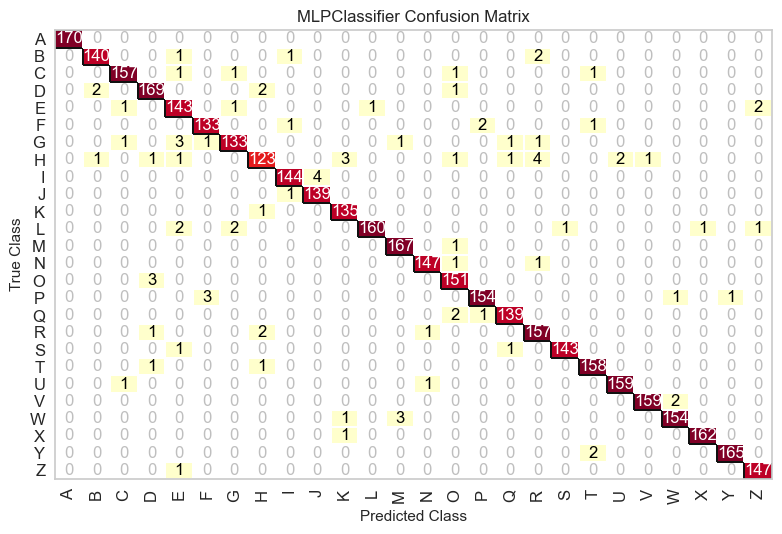

In [14]:
from yellowbrick.classifier import confusion_matrix
cm = confusion_matrix(mlp,X_train,Y_train, X_validation, Y_validation, classes="A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z".split(','))

In [13]:
# !pip install yellowbrick

In [15]:
cm.fit(X_train, Y_train.values.ravel())

ConfusionMatrix(ax=<Axes: title={'center': 'MLPClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                classes=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K',
                         'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V',
                         'W', 'X', 'Y', 'Z'],
                cmap=<matplotlib.colors.ListedColormap object at 0x0000027A4EBA3390>,
                estimator=MLPClassifier(activation='logistic',
                                        hidden_layer_sizes=(250, 300),
                                        max_iter=1000000))

In [16]:

cm.score(X_validation, Y_validation)

C:\Users\walun\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.977

In [17]:
predictions = cm.predict(X_validation)
predictions

array(['C', 'I', 'H', ..., 'R', 'B', 'W'], dtype='<U1')

In [18]:
print("Accuracy: ", accuracy_score(Y_validation, predictions))

Accuracy:  0.977


C:\Users\walun\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


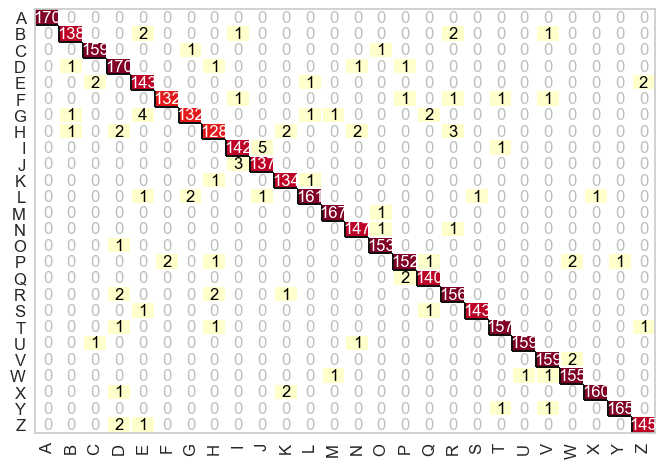

In [19]:
import tkinter as tk
from tkinter import filedialog
from tkinter import messagebox
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from yellowbrick.classifier import ConfusionMatrix

class GUI(tk.Tk):
    def __init__(self):
        super().__init__()
        self.title("MLP Classifier GUI")
        self.geometry("400x300")
        
        self.create_widgets()
    
    def create_widgets(self):
        self.file_label = tk.Label(self, text="Select dataset file:")
        self.file_label.pack(pady=10)
        
        self.file_button = tk.Button(self, text="Browse", command=self.browse_file)
        self.file_button.pack()
        
        self.run_button = tk.Button(self, text="Run Classifier", command=self.run_classifier)
        self.run_button.pack(pady=10)
        
        self.output_label = tk.Label(self, text="")
        self.output_label.pack()
    
    def browse_file(self):
        self.filename = filedialog.askopenfilename(initialdir="/", title="Select file",
                                                   filetypes=(("CSV files", "*.csv"), ("All files", "*.*")))
        self.file_label.config(text=f"Selected file: {self.filename}")
    
    def run_classifier(self):
        if not hasattr(self, 'filename'):
            messagebox.showerror("Error", "Please select a dataset file first.")
            return
        
        dataset = pd.read_csv(self.filename, sep=",")
        X = dataset.iloc[:, 1:17]
        Y = dataset.select_dtypes(include=[object])
        
        X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.20, random_state=10)
        
        scaler = StandardScaler()
        scaler.fit(X_train)
        
        X_train = scaler.transform(X_train)
        X_validation = scaler.transform(X_validation)
        
        mlp = MLPClassifier(hidden_layer_sizes=(250, 300), max_iter=1000000, activation='logistic')
        cm = ConfusionMatrix(mlp, classes="A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z".split(','))
        cm.fit(X_train, Y_train.values.ravel())
        cm.score(X_validation, Y_validation)
        predictions = cm.predict(X_validation)
        accuracy = accuracy_score(Y_validation, predictions)
        
        self.output_label.config(text=f"Accuracy: {accuracy}")

if __name__ == "__main__":
    app = GUI()
    app.mainloop()


C:\Users\walun\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


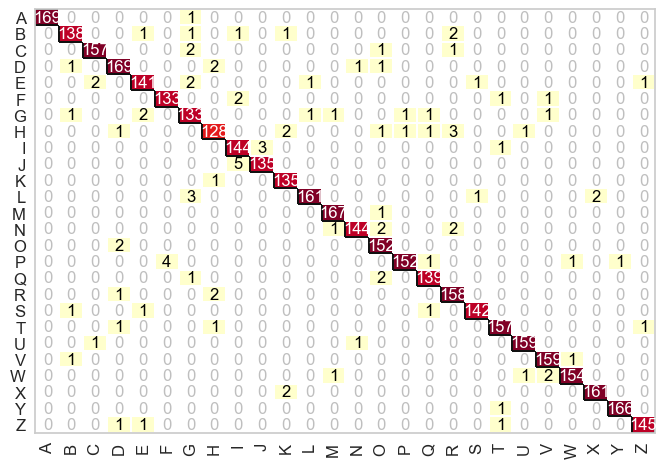

In [4]:
import tkinter as tk
from tkinter import filedialog
from tkinter import messagebox
import cv2
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from yellowbrick.classifier import ConfusionMatrix

class GUI(tk.Tk):
    def __init__(self):
        super().__init__()
        self.title("MLP Classifier GUI")
        self.geometry("400x350")
        
        self.create_widgets()
    
    def create_widgets(self):
        self.file_label = tk.Label(self, text="Select dataset file:")
        self.file_label.pack(pady=5)
        
        self.file_button = tk.Button(self, text="Browse", command=self.browse_file)
        self.file_button.pack()
        
        self.run_button = tk.Button(self, text="Run Classifier", command=self.run_classifier)
        self.run_button.pack(pady=5)
        
        self.image_label = tk.Label(self, text="Select image file:")
        self.image_label.pack(pady=5)
        
        self.image_button = tk.Button(self, text="Browse", command=self.browse_image)
        self.image_button.pack()
        
        self.recognize_button = tk.Button(self, text="Recognize Image", command=self.recognize_image)
        self.recognize_button.pack(pady=5)
        
        self.output_label = tk.Label(self, text="")
        self.output_label.pack(pady=5)
    
    def browse_file(self):
        self.filename = filedialog.askopenfilename(initialdir="/", title="Select file",
                                                   filetypes=(("CSV files", "*.csv"), ("All files", "*.*")))
        self.file_label.config(text=f"Selected file: {self.filename}")
    
    def run_classifier(self):
        if not hasattr(self, 'filename'):
            messagebox.showerror("Error", "Please select a dataset file first.")
            return
        
        dataset = pd.read_csv(self.filename, sep=",")
        X = dataset.iloc[:, 1:17]
        Y = dataset.select_dtypes(include=[object])
        
        X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.20, random_state=10)
        
        scaler = StandardScaler()
        scaler.fit(X_train)
        
        X_train = scaler.transform(X_train)
        X_validation = scaler.transform(X_validation)
        
        mlp = MLPClassifier(hidden_layer_sizes=(250, 300), max_iter=1000000, activation='logistic')
        cm = ConfusionMatrix(mlp, classes="A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z".split(','))
        cm.fit(X_train, Y_train.values.ravel())
        cm.score(X_validation, Y_validation)
        predictions = cm.predict(X_validation)
        accuracy = accuracy_score(Y_validation, predictions)
        
        self.output_label.config(text=f"Accuracy: {accuracy}")
    
    def browse_image(self):
        self.image_filename = filedialog.askopenfilename(initialdir="/", title="Select image file",
                                                          filetypes=(("Image files", "*.jpg;*.png;*.jpeg"), ("All files", "*.*")))
        self.image_label.config(text=f"Selected image: {self.image_filename}")
        self.image = cv2.imread(self.image_filename, cv2.IMREAD_GRAYSCALE)
    
    def recognize_image(self):
        if not hasattr(self, 'image_filename'):
            messagebox.showerror("Error", "Please select an image file first.")
            return
        
        if not hasattr(self, 'filename'):
            messagebox.showerror("Error", "Please select a dataset file first.")
            return
        
        # Perform image recognition here using self.image and the trained model
        # For example:
        # image_features = extract_features(self.image)  # extract features from the image
        # predicted_class = model.predict(image_features)  # use the trained model to predict the class
        messagebox.showinfo("Image Recognition", "Image recognition result: Predicted Class")
        

if __name__ == "__main__":
    app = GUI()
    app.mainloop()


In [3]:
! pip install opencv-python


  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/c7/ec/9dabb6a9abfdebb3c45b0cc52dec901caafef2b2c7e7d6a839ed86d81e91/opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.6 MB 2.6 MB/s eta 0:00:15
   ---------------------------------------- 0.3/38.6 MB 3.9 MB/s eta 0:00:10
   ---------------------------------------- 0.5/38.6 MB 3.5 MB/s eta 0:00:11
    --------------------------------------- 0.7/38.6 MB 3.8 MB/s eta 0:00:11
    --------------------------------------- 0.8/38.6 MB 3.8 MB/s eta 0:00:10
   - -------------------------------------- 1.1/38.6 MB 4.3 MB/s eta 0:00:09
   - --------------------------------